Analytical examples

In [27]:
import TasmanianSG
import numpy as np

# imports specifically needed by the examples
import math
from random import uniform
from datetime import datetime

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt


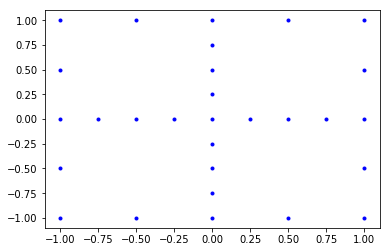

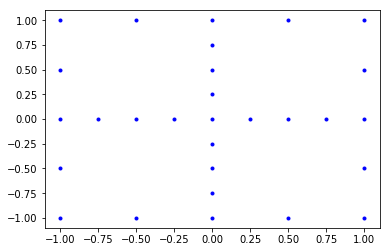

         1        65  3.62e-02


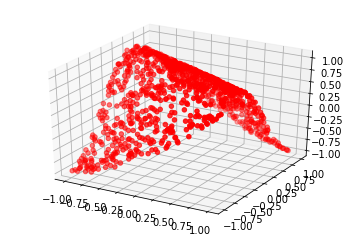

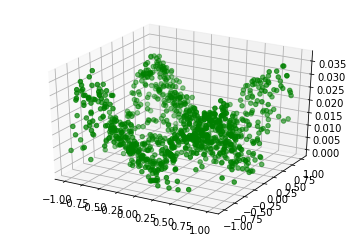

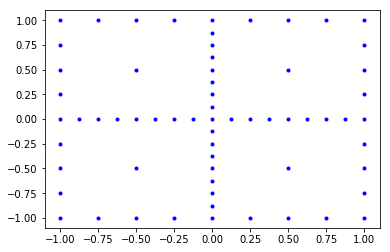

         2       145  1.07e-02


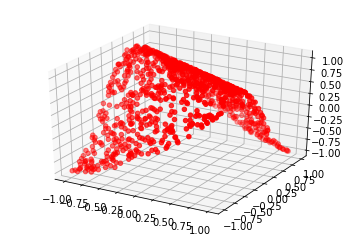

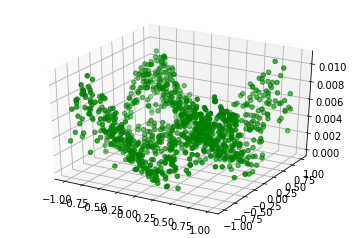

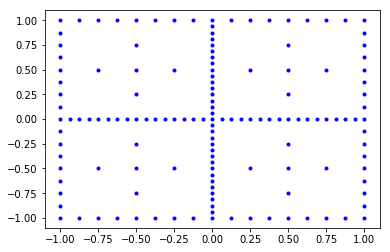

         3       321  2.94e-03


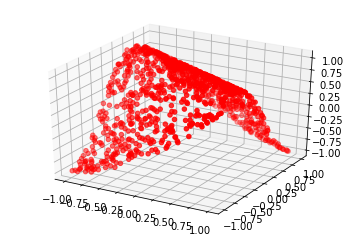

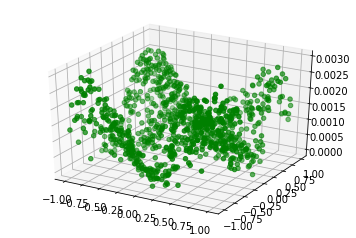

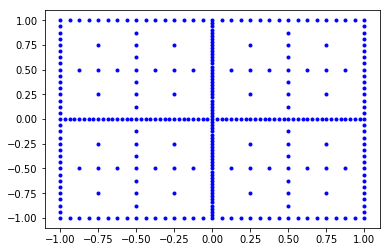

         4       701  8.72e-04


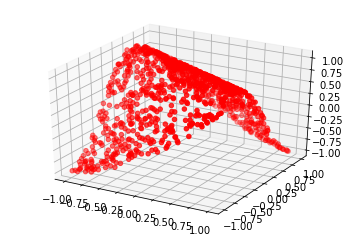

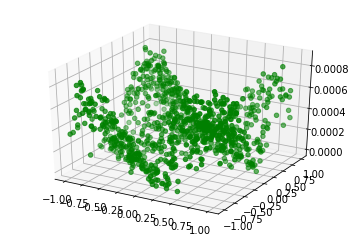

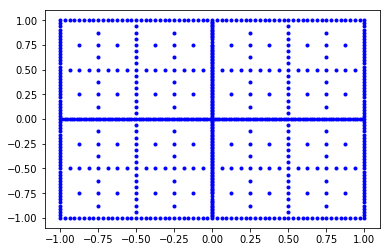

         5      1449  2.51e-04


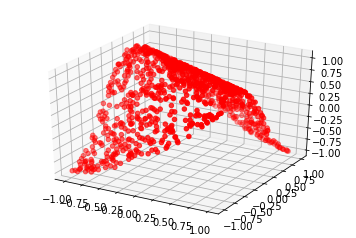

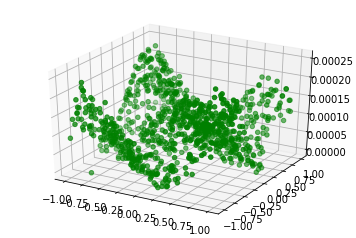

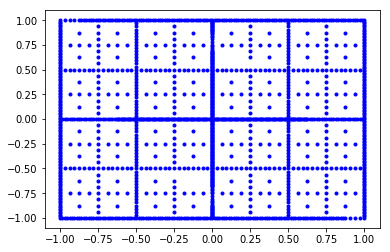

         6      2505  1.01e-04


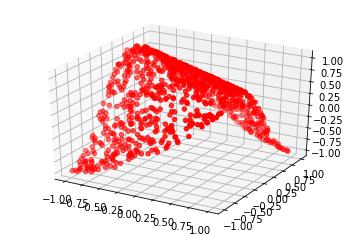

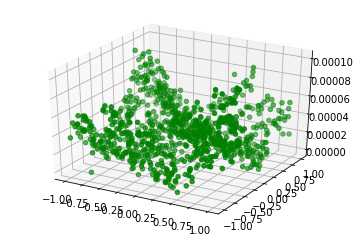

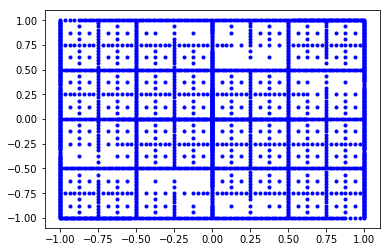

         7      2651  1.01e-04


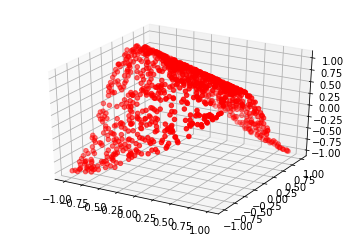

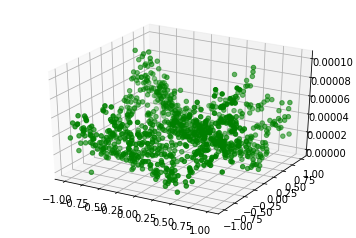

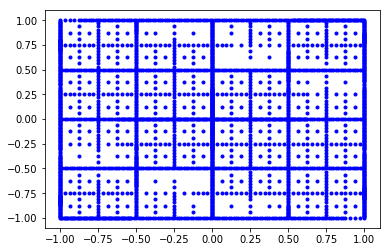

         8      2681  1.01e-04


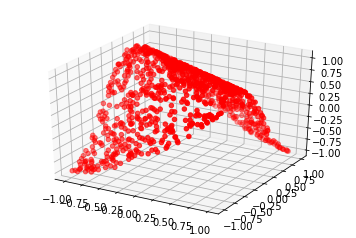

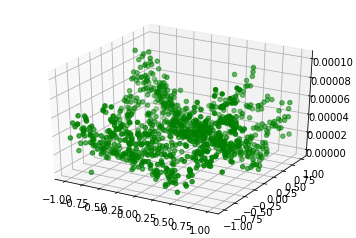

In [28]:
## Problem 1
## interpolate: f(x) = cos(2*pi*w+ np.sum(c*x))
## using refinement

def general(f, c, w, t = None, adaptive = True, tol = 1.E-4, depth = 3, refine = 8):
    grid1 = TasmanianSG.TasmanianSparseGrid()
    #1000 n-d sample points
    aPnts = np.empty([1000, len(c)])  
    for iI in range(1000):
        for iJ in range(len(c)):
            aPnts[iI][iJ] = uniform(-1.0, 1.0)

    
    aTres = np.empty([1000,])
    for iI in range(1000):
        if (t == None): aTres[iI] = f(aPnts[iI], c, w)
        else: aTres[iI] = f(aPnts[iI], c, w, t)
    
    iDim = len(c)
    iOut = 1
    iDepth = depth
    fTol = tol
    which_basis = 1 
    refinement_level = refine
    
    grid1.makeLocalPolynomialGrid(iDim, iOut, iDepth, which_basis, "localp")
    grid1.plotPoints2D()
    
    aPoints = grid1.getPoints()
    aVals = np.empty([aPoints.shape[0], 1])
    for iI in range(aPoints.shape[0]):
        if (t == None): aVals[iI] =  f(aPoints[iI], c, w)
        else:  aVals[iI] =  f(aPoints[iI], c, w, t)
    grid1.loadNeededPoints(aVals)
    
    if adaptive == False:
        aRes = grid.evaluateBatch(aPnts)
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(aPnts[:,0], aPnts[:,1], aRes, c='r', marker='o')
        plt.show()    

        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(aPoints[:,0], aPoints[:,1], aVals, c='r', marker='o')
        plt.show()   

        fError1 = max(np.fabs(aRes[:,0] - aTres))
        print(" For localp    Number of points: {0:1d}   Max. Error: {1:1.16e}".format(iNumP1, fError1))

        # write coordinates of grid to a text file
        f=open("fix_sparse_grid.txt", 'a')
        np.savetxt(f, aPoints, fmt='% 2.16f')
        f.close()
        return
    
    
    for iK in range(refinement_level):
        grid1.plotPoints2D()
        grid1.setSurplusRefinement(fTol, -1, "fds")   #also use fds, or other rules
        aPoints = grid1.getNeededPoints()
        aVals = np.empty([aPoints.shape[0], 1])
        for iI in range(aPoints.shape[0]):
            if (t == None): aVals[iI] = f(aPoints[iI], c, w)
            else: aVals[iI] = f(aPoints[iI], c, w, t)
        grid1.loadNeededPoints(aVals)
        aRes = grid1.evaluateBatch(aPnts)
        fError1 = max(np.fabs(aRes[:,0] - aTres))
        print(" {0:9d} {1:9d}  {2:1.2e}".format(iK+1, grid1.getNumPoints(), fError1))
        
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(aPnts[:,0], aPnts[:,1], aRes, c='r', marker='o')
        plt.show()
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(aPnts[:,0], aPnts[:,1], np.abs(aRes[:,0]-aTres), c='g', marker='o')
        plt.show()
    return

        
c_0 = np.array([1,2])
w_0 = np.array([2,4])
osc = lambda x, c, w: math.cos(2 * math.pi * w[0] + np.sum(c * x))
prodpeak = lambda x, c, w: np.prod(( (1/(c ** 2)) + ((x - w)**2))**-1)
cornpeak = lambda x, c, w: (1 + np.sum(c*x))**(-len(c)-1)
gauss = lambda x, c, w, t: np.exp( - np.sum(c**2 * t * (x - w)**2 ))
cont = lambda x, c, w: np.exp( - np.sum(c * abs(x - w) ))
def disco(x,c,w):
    if x[0] > w[0] or x[1] > w[1]:
        return 0 
    else:
        return np.exp(np.sum(c*x))

general(osc, c, w)


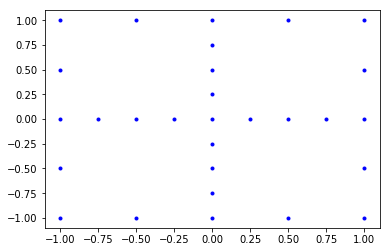

/software/python-2.7.12-el7-x86_64/lib/python2.7/site-packages/ipykernel/__main__.py:85: RuntimeWarning: divide by zero encountered in reciprocal


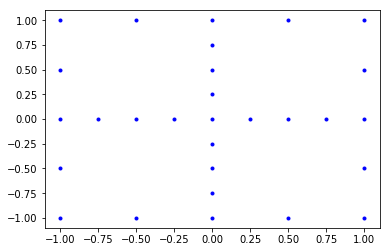

         1        29  1.55e+07


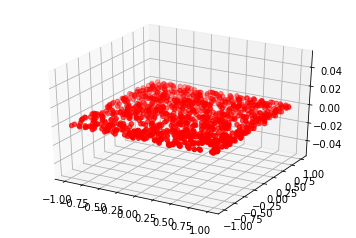

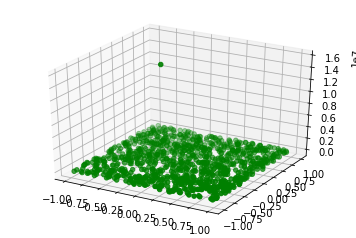

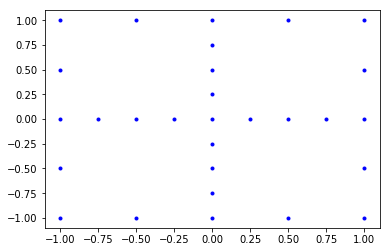

         2        65  inf


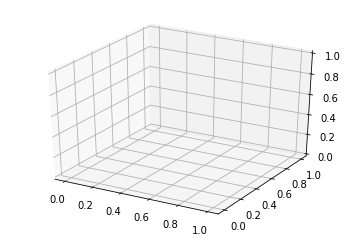

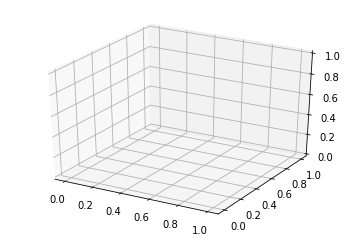

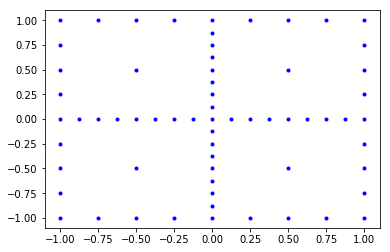

         3        65  3.56e+246


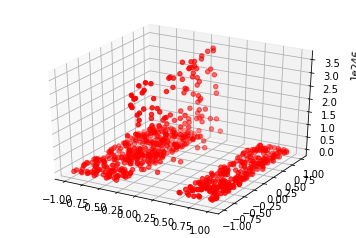

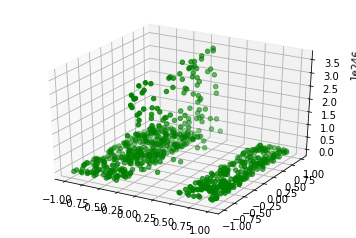

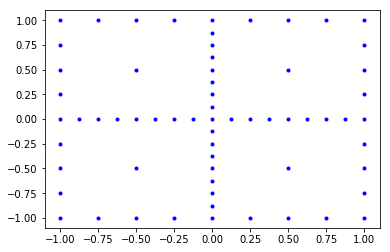

         4        69  inf


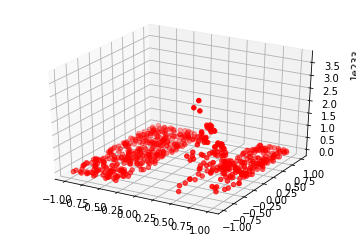

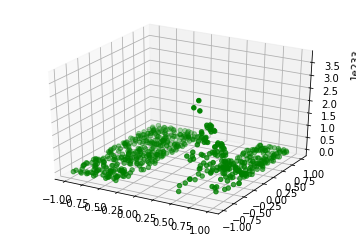

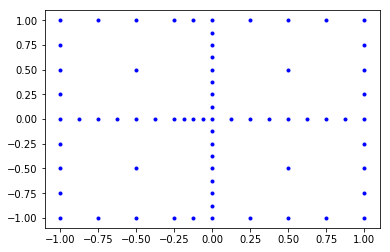

         5        69  6.57e+265


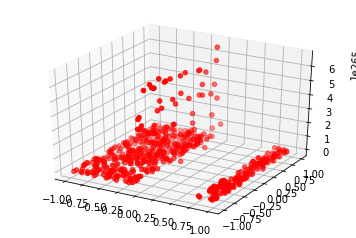

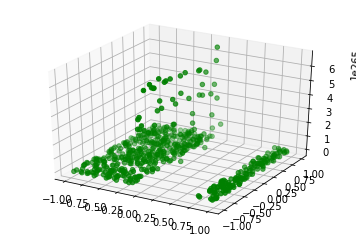

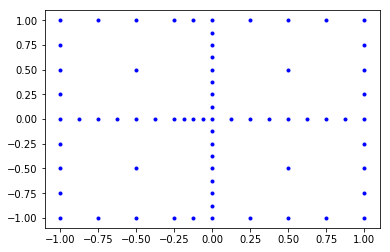

         6        73  inf


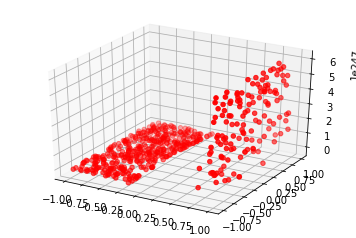

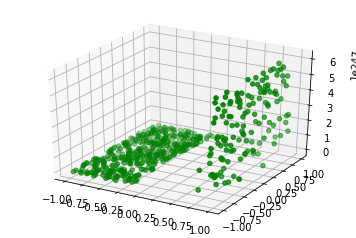

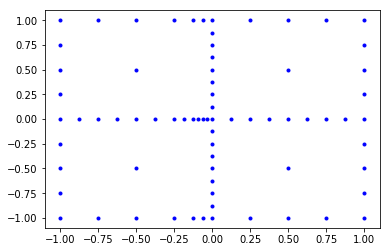

         7        73  5.06e+265


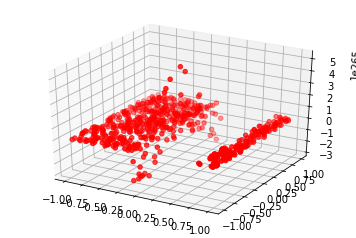

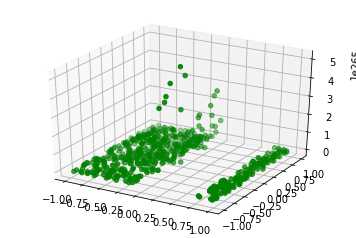

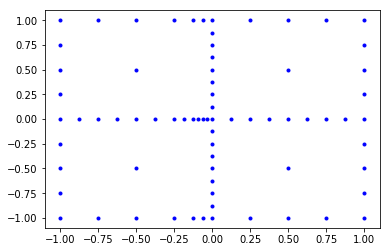

         8        79  inf


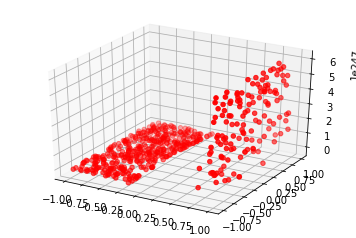

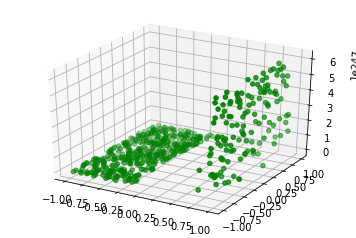

In [29]:
general(prodpeak, c, w)

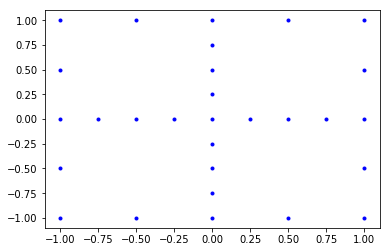

/software/python-2.7.12-el7-x86_64/lib/python2.7/site-packages/ipykernel/__main__.py:86: RuntimeWarning: divide by zero encountered in double_scalars


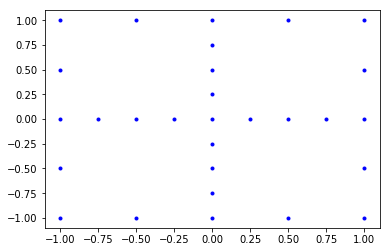

         1        29  5.47e+09


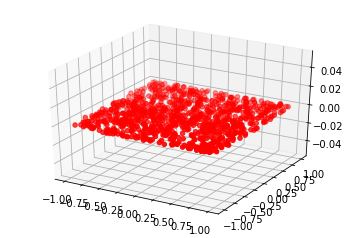

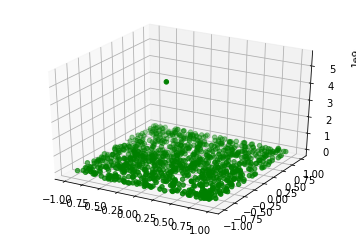

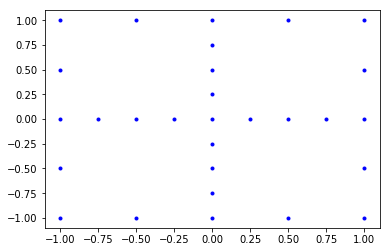

         2        65  5.47e+09


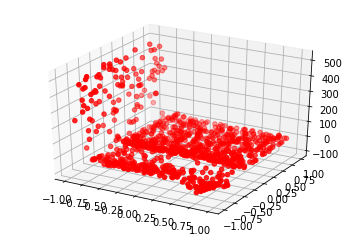

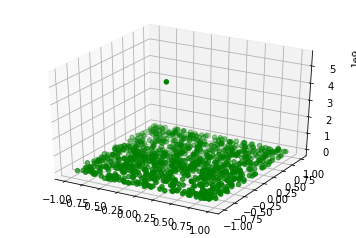

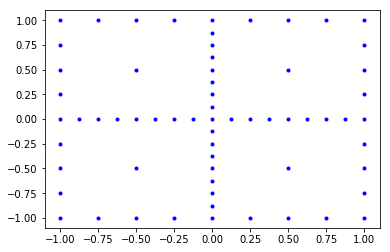

         3       142  inf


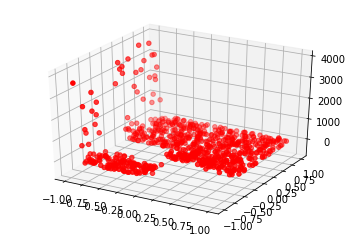

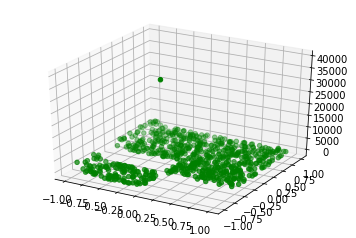

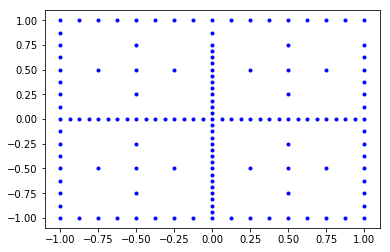

         4       142  nan


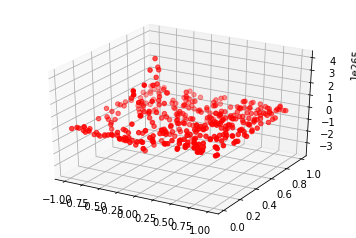

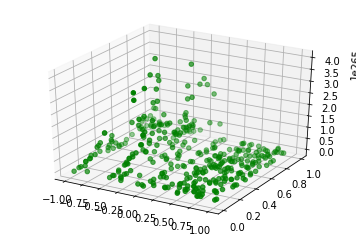

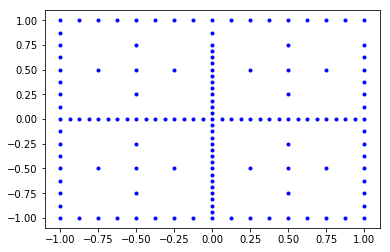

         5       154  nan


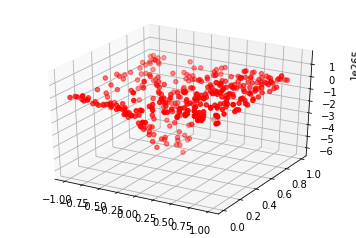

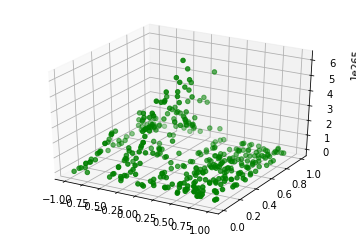

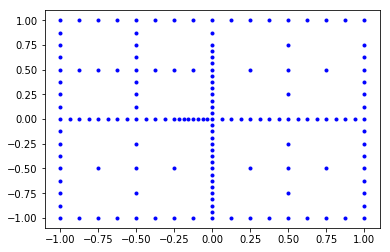

         6       166  nan


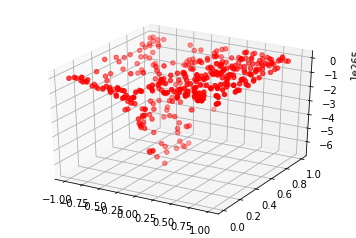

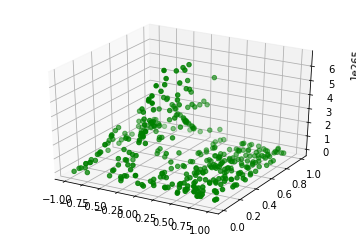

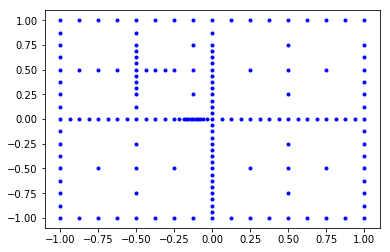

         7       178  nan


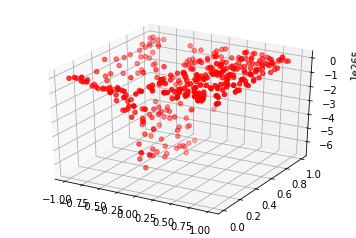

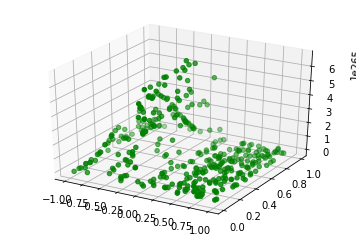

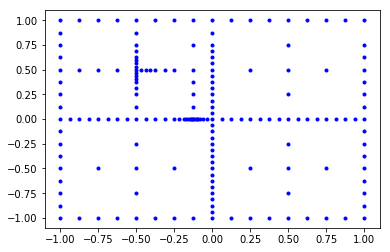

         8       190  nan


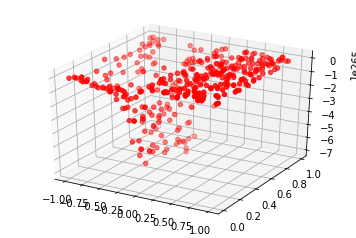

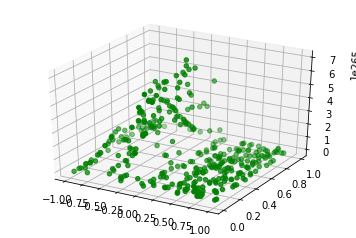

In [30]:
general(cornpeak, c, w)

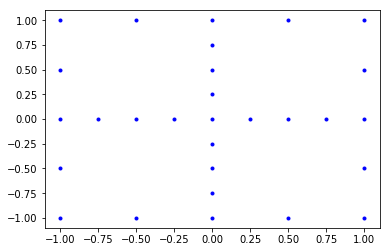

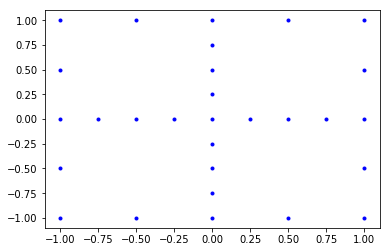

         1        65  1.33e-01


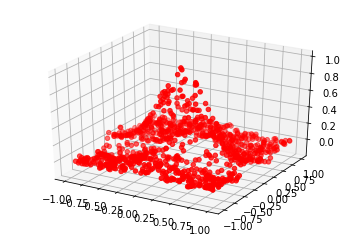

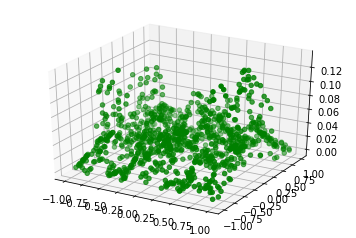

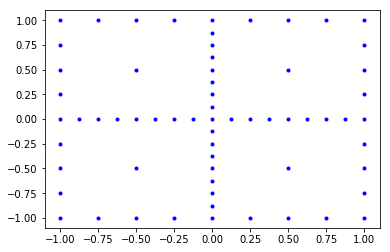

         2       137  5.93e-02


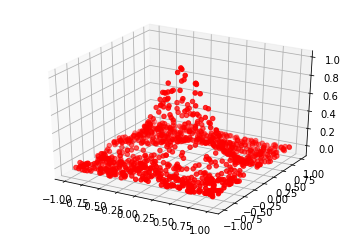

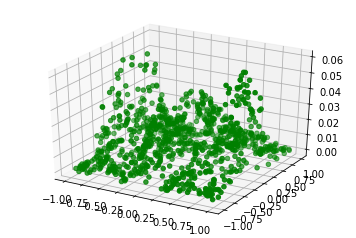

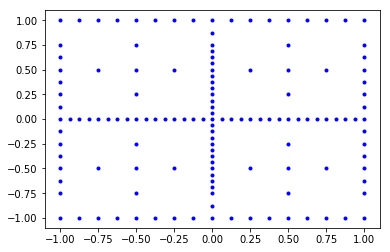

         3       293  2.35e-02


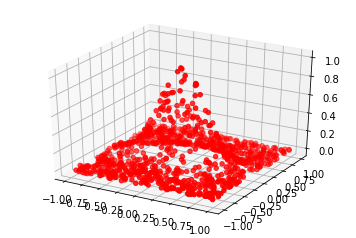

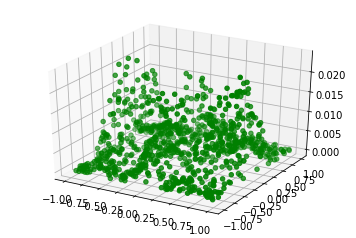

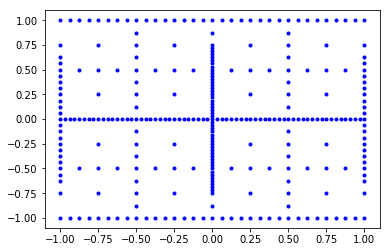

         4       621  9.62e-03


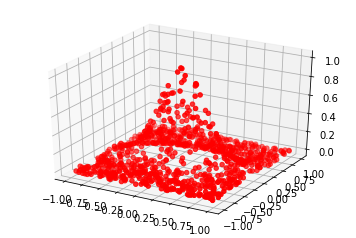

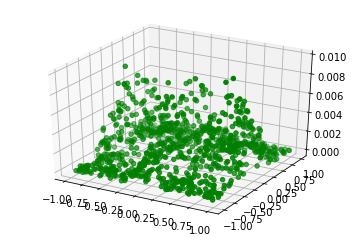

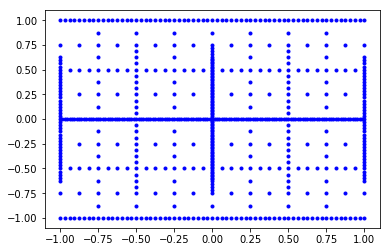

         5      1261  3.63e-03


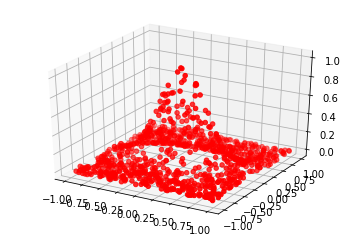

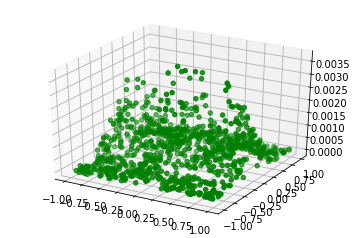

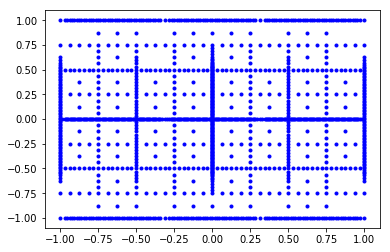

         6      2301  1.61e-03


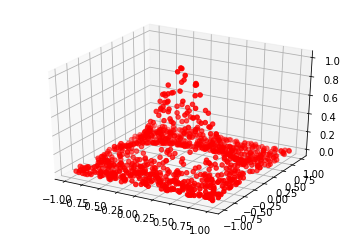

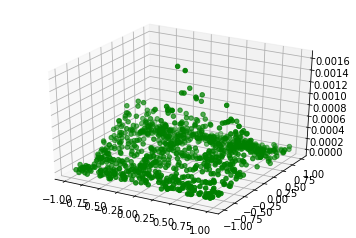

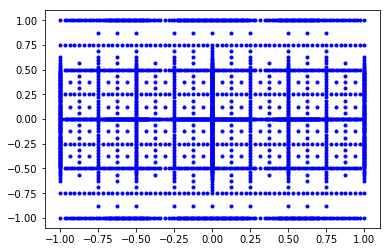

         7      3565  4.52e-04


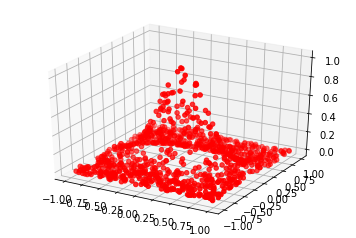

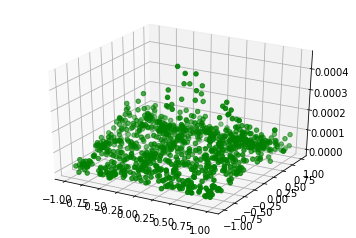

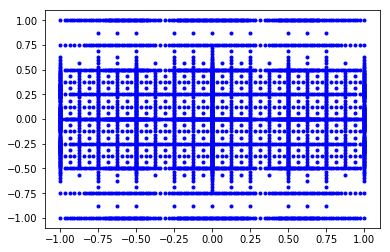

         8      4705  1.67e-04


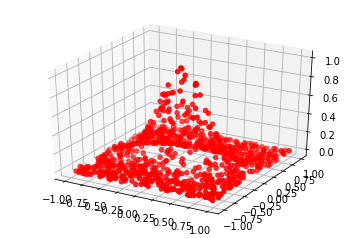

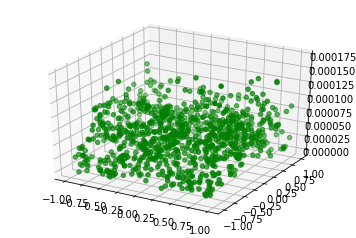

In [31]:
t = 5
general(gauss, c, w, t)

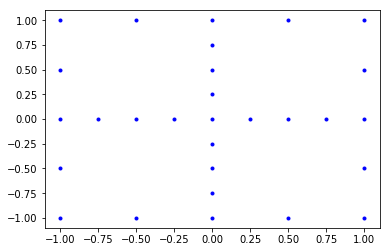

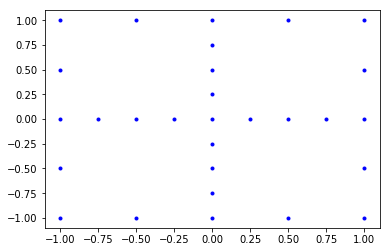

         1        65  1.51e-02


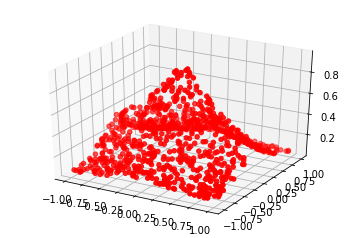

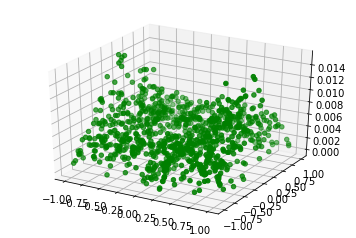

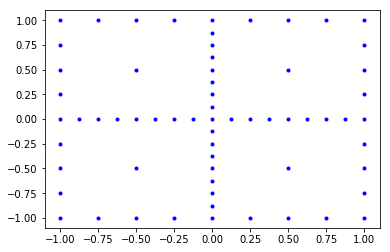

         2       145  4.50e-03


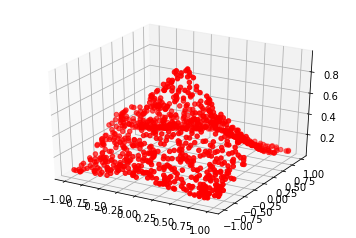

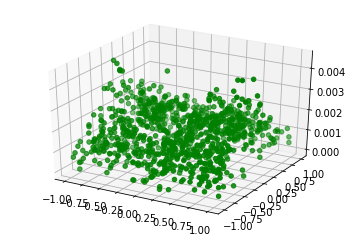

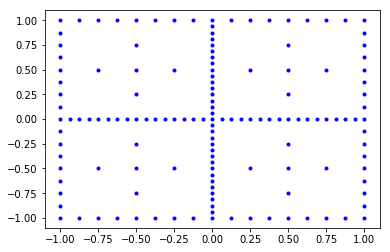

         3       321  1.31e-03


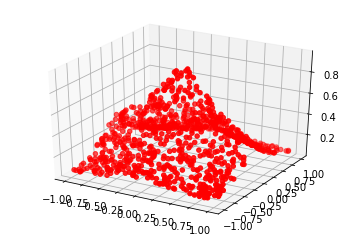

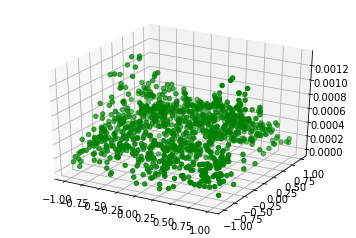

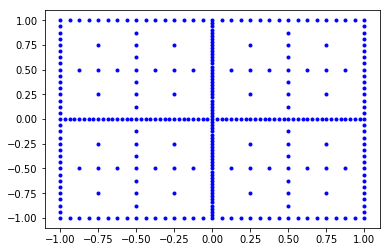

         4       705  3.67e-04


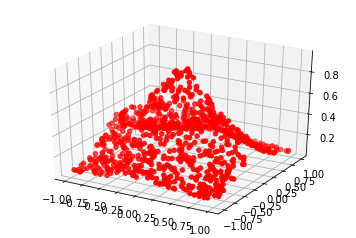

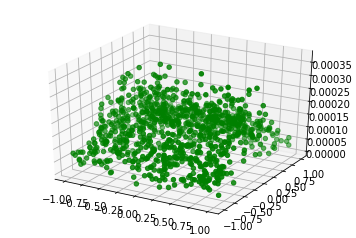

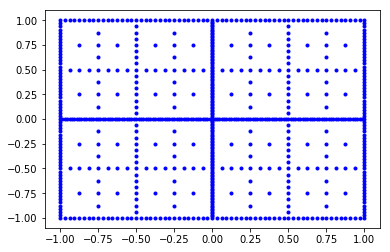

         5      1293  1.15e-04


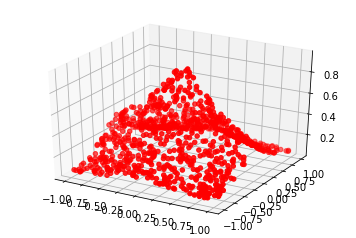

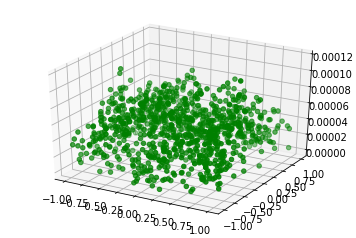

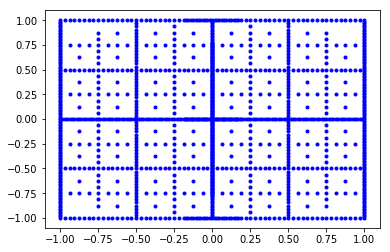

         6      1605  9.63e-05


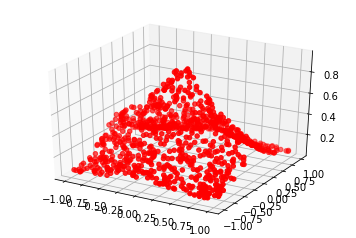

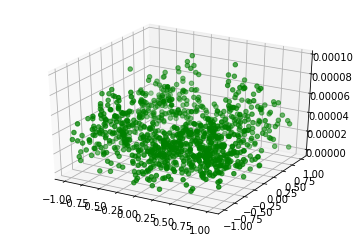

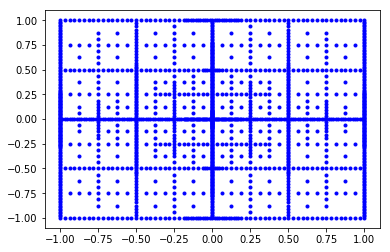

         7      1605  nan


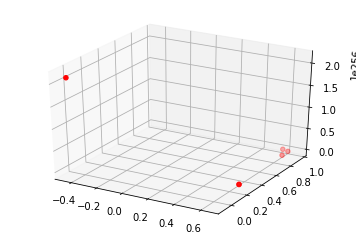

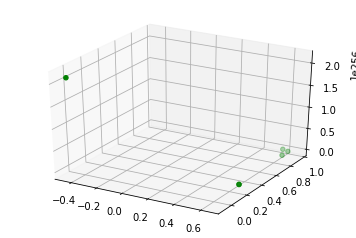

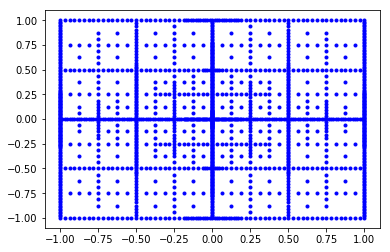

         8      1621  nan


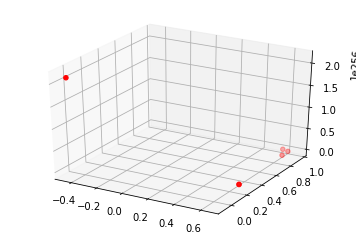

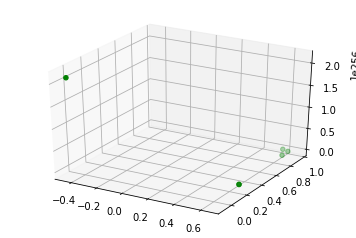

In [32]:
general(cont, c, w)

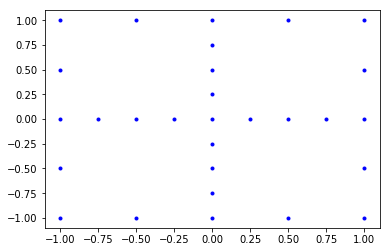

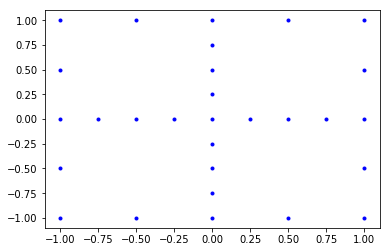

         1        56  9.55e-01


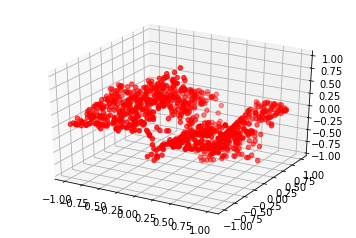

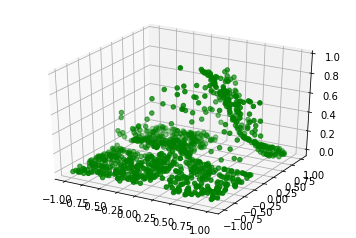

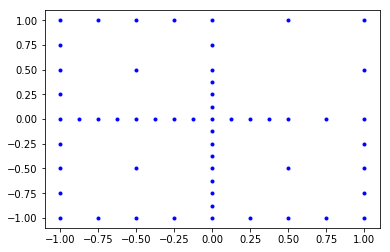

         2       108  9.78e-01


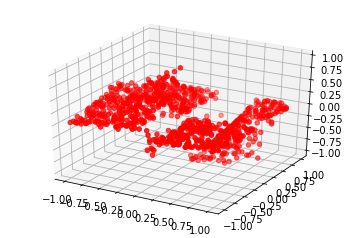

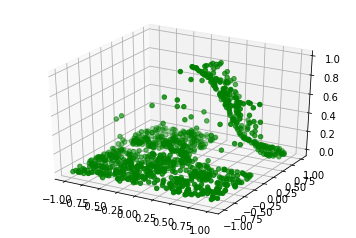

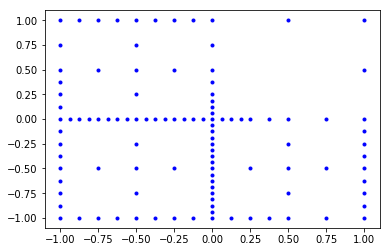

         3       212  9.86e-01


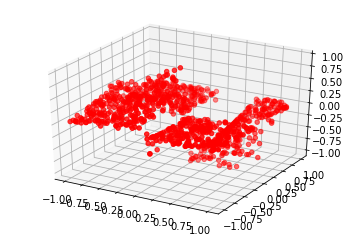

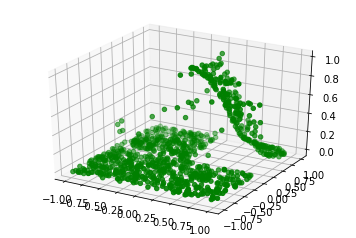

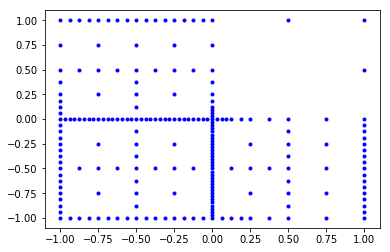

         4       424  9.96e-01


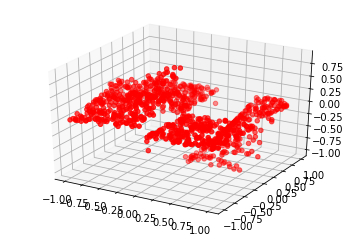

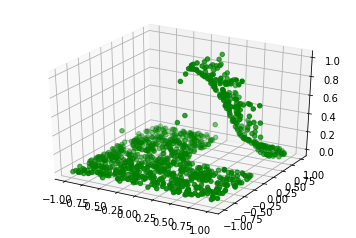

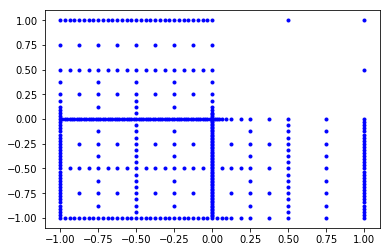

         5       860  9.99e-01


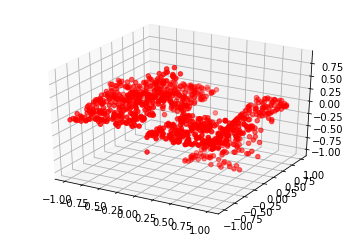

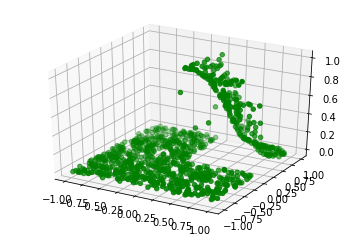

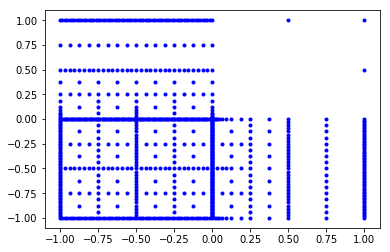

         6      1760  9.99e-01


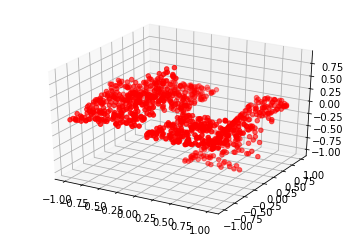

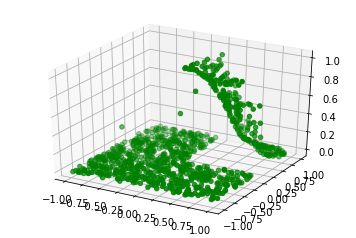

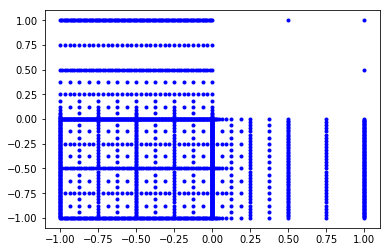

         7      3620  9.99e-01


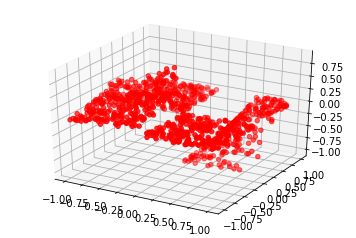

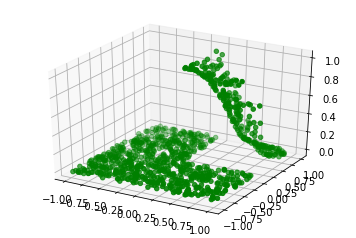

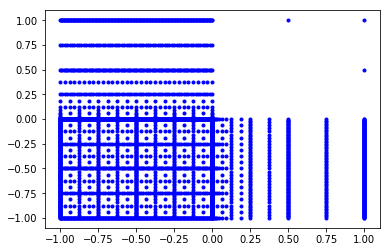

         8      7099  9.99e-01


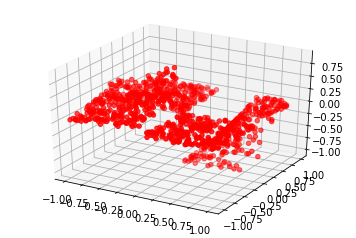

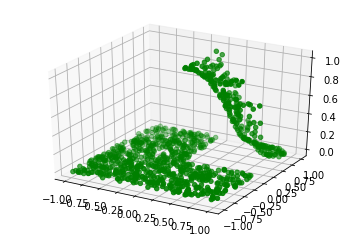

In [35]:
w = [0,0]
general(disco, c, w, None, True, 1.E-6)